머신러닝을 이용한 텍스트 분류
텍스트 분류는 텍스트를 사전 정의된 클래스로 분류하는 자연어처리 Task로 자연어 처리에 가장 기본이며, 비즈니스 영역에서도 수요가 높은 부분으로 대표적으로 리뷰의 긍부정, 뉴스의 카테고리 분류등이 있음

텍스트 분류시 거치는 일반적인 과정
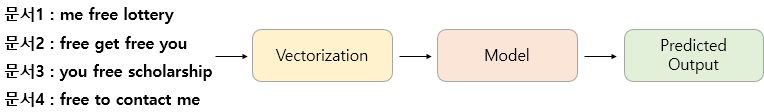

In [43]:
from tensorflow.keras.datasets import reuters
import plotly.express as px
import numpy as np
import pandas as pd

In [44]:
# num_words = 1~10000 word usage
(x_train,y_train), (x_test, y_test) = reuters.load_data(num_words=10000, test_split=0.2)

In [45]:
print(f"train sample num: {len(x_train)}")
print(f"test sample num: {len(x_test)}")

train sample num: 8982
test sample num: 2246


In [46]:
print(x_train[0], x_test[0],sep="\n")

[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]
[1, 4, 1378, 2025, 9, 697, 4622, 111, 8, 25, 109, 29, 3650, 11, 150, 244, 364, 33, 30, 30, 1398, 333, 6, 2, 159, 9, 1084, 363, 13, 2, 71, 9, 2, 71, 117, 4, 225, 78, 206, 10, 9, 1214, 8, 4, 270, 5, 2, 7, 748, 48, 9, 2, 7, 207, 1451, 966, 1864, 793, 97, 133, 336, 7, 4, 493, 98, 273, 104, 284, 25, 39, 338, 22, 905, 220, 3465, 644, 59, 20, 6, 119, 61, 11, 15, 58, 579, 26, 10, 67, 7, 4, 738, 98, 43, 88, 333, 722, 12, 20, 6, 19, 746, 35, 15, 10, 9, 1214, 855, 129, 783, 21, 4, 2280, 244, 364, 51, 16, 299, 452, 16, 515, 4, 99, 29, 5, 4, 364, 281, 48, 10, 9, 1214, 23, 644, 47, 20, 324, 27, 56, 2, 2, 5, 192, 510, 17, 12]


In [47]:
print(y_train[0], y_test[0], sep="\n")

3
3


In [48]:
num_classes = len(set(y_train))
num_classes

46

In [49]:
print(f"news max length : {max((len(seq) for seq in x_train))}")
print(f"news mean length : {sum((len(seq) for seq in x_train))/len(x_train)}")

news max length : 2376
news mean length : 145.5398574927633


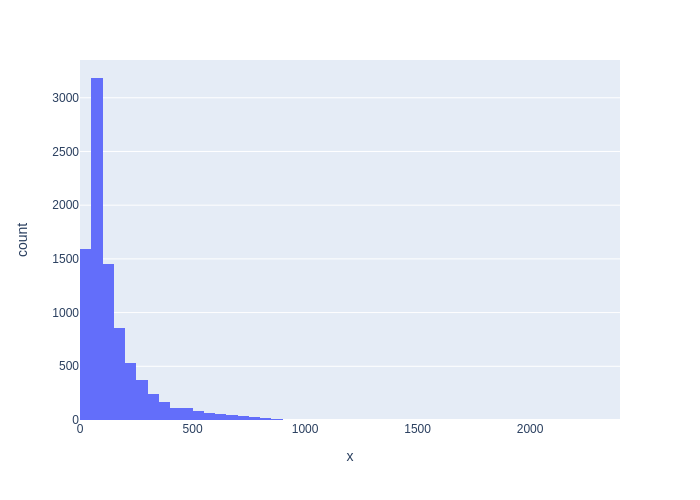

In [16]:
from IPython.display import Image
fig = px.histogram(x=[len(i) for i in x_train] ,nbins=50)
Image(fig.to_image())

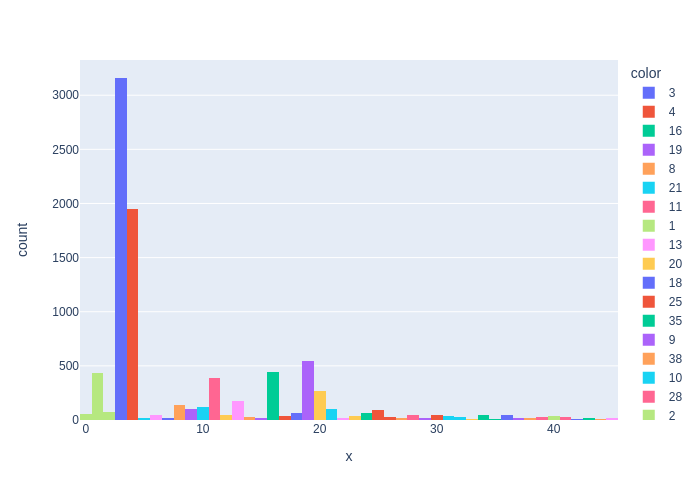

In [24]:
fig = px.histogram(x=y_train,color=y_train)
Image(fig.to_image())

In [50]:
unique_elements, counts_elements = np.unique(y_train, return_counts=True)
print('class frequency')
print(np.asarray((unique_elements, counts_elements)))

class frequency
[[   0    1    2    3    4    5    6    7    8    9   10   11   12   13
    14   15   16   17   18   19   20   21   22   23   24   25   26   27
    28   29   30   31   32   33   34   35   36   37   38   39   40   41
    42   43   44   45]
 [  55  432   74 3159 1949   17   48   16  139  101  124  390   49  172
    26   20  444   39   66  549  269  100   15   41   62   92   24   15
    48   19   45   39   32   11   50   10   49   19   19   24   36   30
    13   21   12   18]]


# n to word

In [51]:
word_index = reuters.get_word_index(path="reuters_word_index.json")
word_index

{'mdbl': 10996,
 'fawc': 16260,
 'degussa': 12089,
 'woods': 8803,
 'hanging': 13796,
 'localized': 20672,
 'sation': 20673,
 'chanthaburi': 20675,
 'refunding': 10997,
 'hermann': 8804,
 'passsengers': 20676,
 'stipulate': 20677,
 'heublein': 8352,
 'screaming': 20713,
 'tcby': 16261,
 'four': 185,
 'grains': 1642,
 'broiler': 20680,
 'wooden': 12090,
 'wednesday': 1220,
 'highveld': 13797,
 'duffour': 7593,
 '0053': 20681,
 'elections': 3914,
 '270': 2563,
 '271': 3551,
 '272': 5113,
 '273': 3552,
 '274': 3400,
 'rudman': 7975,
 '276': 3401,
 '277': 3478,
 '278': 3632,
 '279': 4309,
 'dormancy': 9381,
 'errors': 7247,
 'deferred': 3086,
 'sptnd': 20683,
 'cooking': 8805,
 'stratabit': 20684,
 'designing': 16262,
 'metalurgicos': 20685,
 'databank': 13798,
 '300er': 20686,
 'shocks': 20687,
 'nawg': 7972,
 'tnta': 20688,
 'perforations': 20689,
 'affiliates': 2891,
 '27p': 20690,
 'ching': 16263,
 'china': 595,
 'wagyu': 16264,
 'affiliated': 3189,
 'chino': 16265,
 'chinh': 16266,
 '

In [52]:
index_to_word = {index+3 : word for word, index in word_index.items()}
index_to_word

{10999: 'mdbl',
 16263: 'fawc',
 12092: 'degussa',
 8806: 'woods',
 13799: 'hanging',
 20675: 'localized',
 20676: 'sation',
 20678: 'chanthaburi',
 11000: 'refunding',
 8807: 'hermann',
 20679: 'passsengers',
 20680: 'stipulate',
 8355: 'heublein',
 20716: 'screaming',
 16264: 'tcby',
 188: 'four',
 1645: 'grains',
 20683: 'broiler',
 12093: 'wooden',
 1223: 'wednesday',
 13800: 'highveld',
 7596: 'duffour',
 20684: '0053',
 3917: 'elections',
 2566: '270',
 3554: '271',
 5116: '272',
 3555: '273',
 3403: '274',
 7978: 'rudman',
 3404: '276',
 3481: '277',
 3635: '278',
 4312: '279',
 9384: 'dormancy',
 7250: 'errors',
 3089: 'deferred',
 20686: 'sptnd',
 8808: 'cooking',
 20687: 'stratabit',
 16265: 'designing',
 20688: 'metalurgicos',
 13801: 'databank',
 20689: '300er',
 20690: 'shocks',
 7975: 'nawg',
 20691: 'tnta',
 20692: 'perforations',
 2894: 'affiliates',
 20693: '27p',
 16266: 'ching',
 598: 'china',
 16267: 'wagyu',
 3192: 'affiliated',
 16268: 'chino',
 16269: 'chinh',
 2

In [53]:
print(index_to_word[4])
print(index_to_word[16])

the
it


In [54]:
for index, token in enumerate(("<pad>","<sos>","<unk>")):
    index_to_word[index]=token

In [55]:
print(' '.join([index_to_word[index] for index in x_train[0]]))

<sos> <unk> <unk> said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3


<unk>의 경우 OOV(Out-Of-Vocabulary)현상으로 발생하는 토큰

In [56]:
' '.join([index_to_word[index] for index in [4,587,23,133,6,30,515]])

'the transaction is expected to be completed'

In [57]:
decoded = []
for i in range(len(x_train)):
    t = ' '.join([index_to_word[index] for index in x_train[i]])
    decoded.append(t)

x_train = decoded
print(len(x_train))

8982


In [58]:
decoded = []
for i in range(len(x_test)):
    t = ' '.join([index_to_word[index] for index in x_test[i]])
    decoded.append(t)

x_test = decoded
print(len(x_test))

2246


In [59]:
print(x_train[0])

<sos> <unk> <unk> said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3


In [60]:
x_test[0]

'<sos> the great atlantic and pacific tea co said its three year 345 mln dlr capital program will be be substantially increased to <unk> growth and expansion plans for <unk> inc and <unk> inc over the next two years a and p said the acquisition of <unk> in august 1986 and <unk> in december helped us achieve better than expected results in the fourth quarter ended february 28 its net income from continuing operations jumped 52 6 pct to 20 7 mln dlrs or 55 cts a share in the latest quarter as sales increased 48 3 pct to 1 58 billion dlrs a and p gave no details on the expanded capital program but it did say it completed the first year of the program during 1986 a and p is 52 4 pct owned by lt <unk> <unk> of west germany reuter 3'

In [61]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

DTM, TF-IDF 행렬  
https://wikidocs.net/24559  
1. 문서와 문서에 등장하는 단어의 갯수를 확인 후 DTM을 만듦, 단어에는 중복이 있을 수 있기 때문에 열의 갯수는 중복을 제거후 알 수 있음  
2. DTM기반 같은 단어가 많이 등장할수록 유사도가 높다고 판단하는데 이는 쓸데없이 등장하는 관용어가 노이즈가 됨  

In [62]:
dtm_vector = CountVectorizer()
x_train_dtm = dtm_vector.fit_transform(x_train)
print(x_train_dtm.shape)

(8982, 9670)


In [63]:
x_train_dtm

<8982x9670 sparse matrix of type '<class 'numpy.int64'>'
	with 688943 stored elements in Compressed Sparse Row format>

TF-IDF  
참조링크  
https://wikidocs.net/31698  
1. 모든 문서에 나타난다면 다른 단어보다 중요도 x

In [64]:
tfidf_transformer = TfidfTransformer()
tfidfv = tfidf_transformer.fit_transform(x_train_dtm)
print(tfidfv.shape)

(8982, 9670)


In [65]:
tfidfv

<8982x9670 sparse matrix of type '<class 'numpy.float64'>'
	with 688943 stored elements in Compressed Sparse Row format>

In [72]:
from sklearn.naive_bayes import MultinomialNB # 다항분포 나이브 베이즈
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import ComplementNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score

# 나이브 베이즈 분류기  
8개 메일 중 4개 메일이 스팸  
coupon이 들어간 메일은 3개  
모든 스팸 메일 중 coupon이 들어간 메일은 2개 일때  
P(spam) = 4/8, P(coupon) = 3/8, P(coupon | spam) = 2/4  
P(coupon|spam) 과 P(spam)을 곱한 후 P(coupon)을 나누면 2/3, 66.7%

In [73]:
model = MultinomialNB()
model.fit(tfidfv, y_train)

MultinomialNB()

In [74]:
x_test_dtm = dtm_vector.transform(x_test)
tfidfv_test = tfidf_transformer.transform(x_test_dtm)
predicted = model.predict(tfidfv_test)
print("accuracy:", accuracy_score(y_test,predicted))

accuracy: 0.6567230632235085


In [75]:
x_test[3]

'<sos> <unk> <unk> oil and gas partnership said it completed the sale of interests in two major oil and gas fields to lt energy assets international corp for 21 mln dlrs the company said it sold about one half of its 50 pct interest in the oak hill and north <unk> fields its two largest producing properties it said it used about 20 mln dlrs of the proceeds to <unk> principal on its senior secured notes semi annual principal payments on the remaining 40 mln dlrs of notes have been satisfied until december 1988 as a result it said the company said the note agreements were amended to reflect an easing of some financial covenants and an increase of interest to 13 5 pct from 13 0 pct until december 1990 it said the <unk> exercise price for 1 125 000 warrants was also reduced to 50 cts from 1 50 dlrs the company said energy assets agreed to share the costs of increasing production at the oak hill field reuter 3'

In [76]:
y_test[3]

4

In [78]:
probability_3 = model.predict_proba(tfidfv_test[3])[0]

In [107]:
fig = px.bar(x=model.classes_, y=probability_3,range_x=(-1,21),)

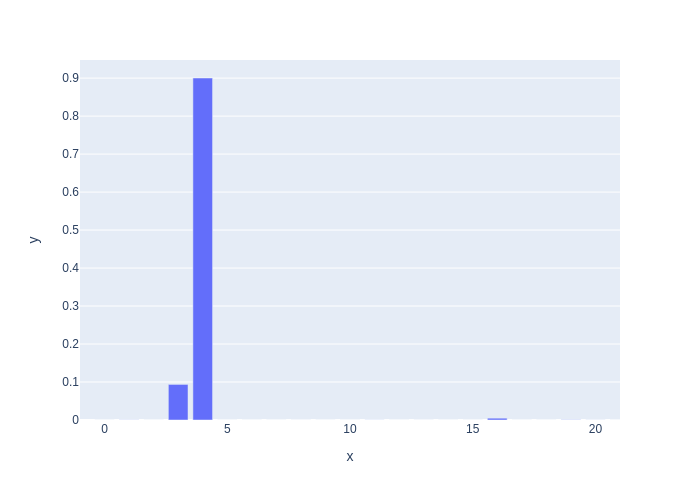

In [108]:
Image(fig.to_image())

In [109]:
model.predict(tfidfv_test[3])

array([4])

# F1-Score, Confusion Matrix  
분류성능 지표  
https://sumniya.tistory.com/26  
accuracy가 제일 직관적으로 모델의 성능을 평가하긴 하지만  
label이 불균형한 경우 이를 고려하기 위해 f1-score를 활용함

In [110]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [111]:
print(classification_report(y_test, model.predict(tfidfv_test),zero_division=0))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        12
           1       0.62      0.69      0.65       105
           2       0.00      0.00      0.00        20
           3       0.81      0.90      0.85       813
           4       0.51      0.96      0.67       474
           5       0.00      0.00      0.00         5
           6       0.00      0.00      0.00        14
           7       0.00      0.00      0.00         3
           8       0.00      0.00      0.00        38
           9       1.00      0.08      0.15        25
          10       0.00      0.00      0.00        30
          11       0.66      0.63      0.64        83
          12       0.00      0.00      0.00        13
          13       1.00      0.03      0.05        37
          14       0.00      0.00      0.00         2
          15       0.00      0.00      0.00         9
          16       0.69      0.56      0.61        99
          17       0.00    

macro : 단순 평균  
weighted : 클래스에 속하는 표본의 개수로 가중평균  
accuracy : 전체 학습 데이터 개수에서 클래스를 정확하게 맞춘 개수 비율

# Confusion matrix  
TP는 True 예측과 True 실제값  
FN은 False예측과 True 실제값

In [124]:
import matplotlib.pyplot as plt
import seaborn as sns

In [125]:
def graph_confusion_matrix(model, x_test, y_test):#, classes_name):
    df_cm = pd.DataFrame(confusion_matrix(y_test, model.predict(x_test)))#, index=classes_name, columns=classes_name)
    fig = plt.figure(figsize=(12,12))
    heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=12)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=12)
    plt.ylabel('label')
    plt.xlabel('predicted value')

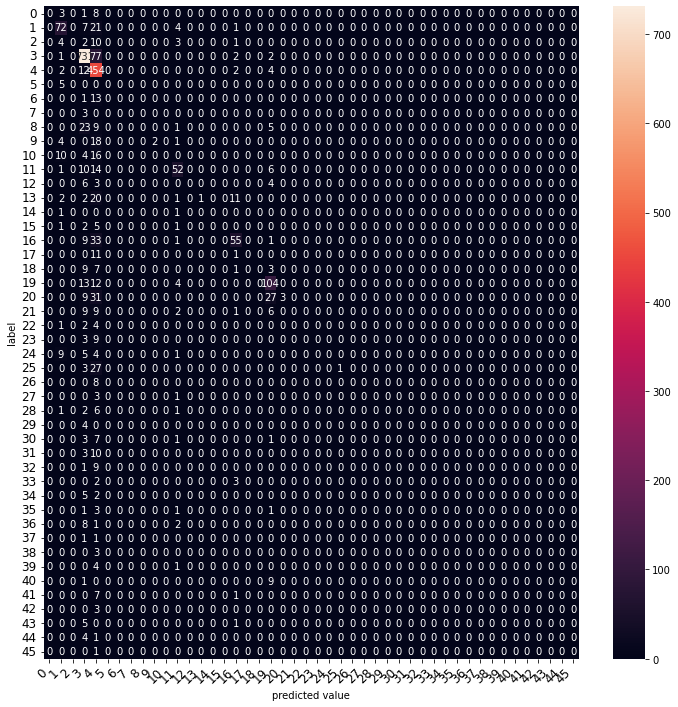

In [126]:
graph_confusion_matrix(model, tfidfv_test, y_test)

# Complement Naive Bayes Classifier  
데이터가 불균형한 경우 나이브 베이즈 분류기를 보완한 것으로 불균형을 고려하여 가중치를 부여함

In [127]:
cb = ComplementNB()
cb.fit(tfidfv, y_train)

ComplementNB()

In [128]:
predicted = cb.predict(tfidfv_test)
print("accuracy: ", accuracy_score(y_test, predicted))

accuracy:  0.7707034728406055


# Logistic Regression  
소프트맥스 함수를 사용한 다중 클래스 분류 알고리즘이 가능하며 회귀라는 이름과 다르게 분류 문제를 해결함  
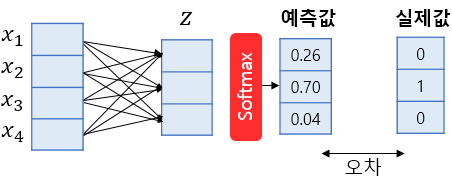  
각 클래스가 정답일 확률을 표현하도록 정규화해주는 함수 소프트맥스

In [129]:
lr = LogisticRegression(C=10000, penalty='l2')
lr.fit(tfidfv, y_train)

/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression(C=10000)

In [130]:
predicted = lr.predict(tfidfv_test)
print("accuracy: ", accuracy_score(y_test,predicted))

accuracy:  0.8076580587711487


# Linear Support Vector Machine  
Decision Boundary와 가장 가까운 각 클래스의 데이터를 서포트 벡터라고 함  
선형 분류 모델은 대체로 이진 분류만을 지원하는데 (로지스틱 회귀는 예외) LinearSVC의 경우 이진 분류를 위해서 이지만, 다중 클래스 분류로도 활용 가능함  
일대다 방식으로 다른 클래스와 구분하도록 학습시켜 사용이 가능

In [132]:
from sklearn.svm import LinearSVC

In [133]:
lsvc = LinearSVC(C=1000, penalty='l1',max_iter=500,dual=False)
lsvc.fit(tfidfv,y_train)

/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:1199: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



LinearSVC(C=1000, dual=False, max_iter=500, penalty='l1')

In [134]:
predicted = lsvc.predict(tfidfv_test)
print("accuracy: ", accuracy_score(y_test,predicted))

accuracy:  0.7769367764915405


# Decision True  
결정 트리는 분류와 회귀 문제 널리 사용되며, 결정에 다다르기 위해 예/아니오 질문을 통해 답을 찾아감  

In [135]:
tree = DecisionTreeClassifier(max_depth=10, random_state=0)
tree.fit(tfidfv, y_train)

DecisionTreeClassifier(max_depth=10, random_state=0)

In [136]:
predicted = tree.predict(tfidfv_test)
print("accuracy: ", accuracy_score(y_test, predicted))

accuracy:  0.6202137132680321


# Random Forest  
결정 트리가 훈련 데이터에 오버피팅 경향이 있는데 이를 앙상블로 해결함  
서로 다른 방향으로 과적합된 트리들을 조합하면 모델 전체에서 과적합을 피할 수 있음

In [137]:
forest = RandomForestClassifier(n_estimators=5, random_state=0)
forest.fit(tfidfv,y_train)

RandomForestClassifier(n_estimators=5, random_state=0)

In [138]:
predicted = forest.predict(tfidfv_test)
print("accuracy: ",accuracy_score(y_test,predicted))

accuracy:  0.674087266251113


# GradientBoostingClassifier  
그래디언트 부스팅 트리는 여러 결정 트리를 묶어 만드는 앙상블 모델  
이전 트리의 오차를 보완하는 방식으로 순차적 트리를 만듦  
일부 특성을 무시하는 특징이 있으며, 보통 랜덤 포레스트를 먼저 사용해보고 성능이나  예측 시간을 줄이기 위해 사용  
1~5정도 깊지 않은 트리를 사용해서 메모리도 적게 사용하고 예측도 빠름  
정확도도 준수하고 예측속도가 빨라 데이터 대회에서 많이 우승했으나, 훈련 시간 속도가 좀 걸리고 트리 기반 모델 특성으로 고차원 데이터에 대해 잘 동작하지 않음

In [ ]:
grbt = GradientBoostingClassifier(random_state=0) # verbose=3
grbt.fit(tfidfv, y_train)

In [ ]:
predicted = grbt.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교

# Voting  
캐글 대회에서 많은 솔루션이 앙상블을 사용하며, 그중 투표를 통해 결정하는 보팅 기법  
https://youtu.be/y4Wh0E1d4oE  
소프트 보팅은 최종 결과물이 나올 확률 값을 다 더해서 최종 결과물에 대한 각각 확률을 구한 뒤 최종값을 도출함

In [1]:
voting_classifier = VotingClassifier(estimators=[
    ('lr', LogisticRegression(C=10000, penalty='l2')),
    ('cb', ComplementNB()),
    ('grbt', GradientBoostingClassifier(random_state=0))
], voting='soft',n_jobs=-1)
voting_classifier.fit(tfidfv,y_train)

NameError: name 'VotingClassifier' is not defined

In [141]:
predicted = voting_classifier.predict(tfidfv_test)
print("accuracy: ", accuracy_score(y_test,predicted))

AttributeError: 'VotingClassifier' object has no attribute 'estimators_'

# Project

1. 모든 단어 사용  
2. 상위 5000 단어 사용  
3. 자유 단어 사용  
사용 모델  
나이브 베이즈 분류기, CNB, 로지스틱회귀, 서포트 벡터 머신, 결정 트리, 랜덤 포레스트, 그래디언트 부스팅 트리, 보팅  
4. 딥러닝 모델과 비교해보기  

평가기준  
1. 분류모델 accuracy 기준 이상, 8가지 머신러닝 기법적용하여 최적 솔루션  
2. F1score 기준 이상, Vocab 사이즈에 따른 성능 변화 살피고 머신러닝 알고리즘 특성에 근거 원인분석  
3. 딥러닝 모델을 활용한 성능 비교, 동일 데이터셋과 전처리 조건으로 딥러닝 모델 성능과 비교하여 결과에 따른 원인 분석

In [5]:
from sklearn.naive_bayes import MultinomialNB # 다항분포 나이브 베이즈
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import ComplementNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import sklearn

In [6]:
import tensorflow as tf
from tensorflow.keras.datasets import reuters
import numpy as np
import pandas as pd
from IPython.display import Image
import plotly.express as px
import time

In [7]:
class TestMachineLearning():
    def __init__(self, num_word=5000, model_name="NAIVE"):
        self.train_time = 0
        self.num_word = num_word
        self.model_name = model_name
        (self.x_train,self.y_train),(self.x_test,self.y_test) = self.get_news(self.num_word)
        self.word_index = reuters.get_word_index(path="reuters_word_index.json")
        self.index_word = self.get_index_word()
        self.decoded_x_train = self.decode_sentence(self.x_train)
        self.decoded_x_test = self.decode_sentence(self.x_test)
        self.x_train_dtm, self.dtm_vectorizer = self.get_dtm()
        self.x_test_dtm = self.dtm_vectorizer.transform(self.decoded_x_test)
        self.x_train_tfidf,self.tfidf_transformer = self.get_tfidf()
        self.x_test_tfidf = self.tfidf_transformer.transform(self.x_test_dtm)
        self.model = self.get_model()
        self.trained_model = self.train_model()
        self.pred = self.get_pred()
        self.accuracy = self.get_accuracy()
        self.report = classification_report(self.y_test, self.get_pred())
        
            
    def get_news(self,num_word):
        (x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=num_word,test_split=0.2,)
        return (x_train, y_train), (x_test, y_test)

    def get_index_word(self):
        index_word = {index+3:word for word,index in self.word_index.items() }
        index_word[0] = "<sos>"
        index_word[1] = "<pad>"
        index_word[2] = "<unk>"
        return index_word

    def decode_sentence(self,sentences):
        decoded = []
        for sentence in sentences:
            t = ' '.join([self.index_word[index] for index in sentence])
            decoded.append(t)
        return decoded

    def get_dtm(self):
        dtm_vectorizer = CountVectorizer()
        dtm_vector = dtm_vectorizer.fit_transform(self.decoded_x_train)
        return dtm_vector, dtm_vectorizer
    
    def get_tfidf(self):
        tfidf_transformer = TfidfTransformer()
        tfidfvector = tfidf_transformer.fit_transform(self.x_train_dtm)
        return tfidfvector,tfidf_transformer

    def get_model(self):
        model_dic = {
        "NAIVE":MultinomialNB(),
        "CNB":ComplementNB(),
        "LR":LogisticRegression(C=10000, penalty="l2"),
        "SVC":LinearSVC(C=1000, penalty='l1',max_iter=500,dual=False),
        "DT":DecisionTreeClassifier(max_depth=10,random_state=0),
        "RF":RandomForestClassifier(n_estimators=5, random_state=0),
        "GB":GradientBoostingClassifier(random_state=0),
        "VOTE":VotingClassifier(estimators=[
            ('lr',LogisticRegression(C=10000, penalty='l2')),
            ('cb', ComplementNB()),
            #('svc',LinearSVC(C=1000,penalty='l1',max_iter=500,dual=False))
        ],voting='soft')
    }
        return model_dic[self.model_name]

    def train_model(self):
        start = time.time()
        self.model.fit(self.x_train_tfidf, self.y_train)
        self.train_time = time.time() - start
        return self.model.fit(self.x_train_tfidf, self.y_train)

    def get_pred(self):
        result = self.model.predict(self.x_test_tfidf) 
        return result

    def get_accuracy(self):
        score = accuracy_score(self.y_test, self.pred)
        return score
    

# 단어의 제한이 없을 때

In [ ]:
model_names = ['NAIVE', 'CNB','LR', 'SVC', 'DT', 'RF', 'GB', 'VOTE']
result_model = {}
accuracy = {}
reports = {}
time_dic = {}
for i in model_names:
    result = TestMachineLearning(None,i)
    accuracy[i] = result.accuracy
    reports[i] = result.report
    result_model[i] = result.train_model
    time_dic[i] = result.train_time

/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classificat

In [25]:
result_df = pd.DataFrame({"accuracy":accuracy.values(),"reports":reports.values(),"time":time_dic.values(),"models":result_model.values()},index=accuracy.keys())

# Accuracy

In [36]:
result_df.sort_values(by="accuracy",ascending=False)

,accuracy,reports,time,models
LR,0.811220,precision recall f1-score ...,59.282284,<bound method TestMachineLearning.train_model ...
SVC,0.779608,precision recall f1-score ...,35.473242,<bound method TestMachineLearning.train_model ...
GB,0.767142,precision recall f1-score ...,1210.148654,<bound method TestMachineLearning.train_model ...
CNB,0.764915,precision recall f1-score ...,0.123317,<bound method TestMachineLearning.train_model ...
RF,0.662956,precision recall f1-score ...,2.728580,<bound method TestMachineLearning.train_model ...
DT,0.620214,precision recall f1-score ...,1.878521,<bound method TestMachineLearning.train_model ...
NAIVE,0.599733,precision recall f1-score ...,0.117363,<bound method TestMachineLearning.train_model ...


# Time

In [33]:
result_df.sort_values(by='time')

,accuracy,reports,time,models
NAIVE,0.599733,precision recall f1-score ...,0.117363,<bound method TestMachineLearning.train_model ...
CNB,0.764915,precision recall f1-score ...,0.123317,<bound method TestMachineLearning.train_model ...
DT,0.620214,precision recall f1-score ...,1.878521,<bound method TestMachineLearning.train_model ...
RF,0.662956,precision recall f1-score ...,2.728580,<bound method TestMachineLearning.train_model ...
SVC,0.779608,precision recall f1-score ...,35.473242,<bound method TestMachineLearning.train_model ...
LR,0.811220,precision recall f1-score ...,59.282284,<bound method TestMachineLearning.train_model ...
GB,0.767142,precision recall f1-score ...,1210.148654,<bound method TestMachineLearning.train_model ...


In [35]:
result_df.sort_values(by=["accuracy","time"],ascending=False)

,accuracy,reports,time,models
LR,0.811220,precision recall f1-score ...,59.282284,<bound method TestMachineLearning.train_model ...
SVC,0.779608,precision recall f1-score ...,35.473242,<bound method TestMachineLearning.train_model ...
GB,0.767142,precision recall f1-score ...,1210.148654,<bound method TestMachineLearning.train_model ...
CNB,0.764915,precision recall f1-score ...,0.123317,<bound method TestMachineLearning.train_model ...
RF,0.662956,precision recall f1-score ...,2.728580,<bound method TestMachineLearning.train_model ...
DT,0.620214,precision recall f1-score ...,1.878521,<bound method TestMachineLearning.train_model ...
NAIVE,0.599733,precision recall f1-score ...,0.117363,<bound method TestMachineLearning.train_model ...


In [77]:
vote_result = TestMachineLearning(None,"VOTE")

/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

In [78]:
vote_result.accuracy

0.8138913624220837

In [80]:
vote_result.train_time

58.871772050857544

# 단어 제한 1000

In [8]:
model_names = ['NAIVE', 'CNB','LR', 'SVC', 'DT', 'RF', 'GB', 'VOTE']
result_model = {}
accuracy = {}
reports = {}
time_dic = {}
for i in model_names:
    result = TestMachineLearning(1000,i)
    accuracy[i] = result.accuracy
    reports[i] = result.report
    result_model[i] = result.train_model
    time_dic[i] = result.train_time

565248/550378 [==============================] - 0s 0us/step


/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classificat

In [9]:
result_df_1000 = pd.DataFrame({"accuracy":accuracy.values(),"reports":reports.values(),"time":time_dic.values(),"models":result_model.values()},index=accuracy.keys())

In [12]:
result_df_1000.sort_values(by='accuracy',ascending=False)

,accuracy,reports,time,models
VOTE,0.784061,precision recall f1-score ...,16.594769,<bound method TestMachineLearning.train_model ...
LR,0.780053,precision recall f1-score ...,18.257174,<bound method TestMachineLearning.train_model ...
GB,0.739537,precision recall f1-score ...,861.690187,<bound method TestMachineLearning.train_model ...
CNB,0.734639,precision recall f1-score ...,0.032966,<bound method TestMachineLearning.train_model ...
SVC,0.717275,precision recall f1-score ...,43.583577,<bound method TestMachineLearning.train_model ...
RF,0.700801,precision recall f1-score ...,1.094987,<bound method TestMachineLearning.train_model ...
NAIVE,0.685663,precision recall f1-score ...,0.033643,<bound method TestMachineLearning.train_model ...
DT,0.616652,precision recall f1-score ...,1.256663,<bound method TestMachineLearning.train_model ...


In [13]:
result_df_1000.sort_values(by='time')

,accuracy,reports,time,models
CNB,0.734639,precision recall f1-score ...,0.032966,<bound method TestMachineLearning.train_model ...
NAIVE,0.685663,precision recall f1-score ...,0.033643,<bound method TestMachineLearning.train_model ...
RF,0.700801,precision recall f1-score ...,1.094987,<bound method TestMachineLearning.train_model ...
DT,0.616652,precision recall f1-score ...,1.256663,<bound method TestMachineLearning.train_model ...
VOTE,0.784061,precision recall f1-score ...,16.594769,<bound method TestMachineLearning.train_model ...
LR,0.780053,precision recall f1-score ...,18.257174,<bound method TestMachineLearning.train_model ...
SVC,0.717275,precision recall f1-score ...,43.583577,<bound method TestMachineLearning.train_model ...
GB,0.739537,precision recall f1-score ...,861.690187,<bound method TestMachineLearning.train_model ...


# LSTM 모델

vocab_size = 1000  
embedding_dim = 128  
hidden_units = 128  
num_classes = 46  
BATCH_SIZE = 256  
MAX_LEN = 456

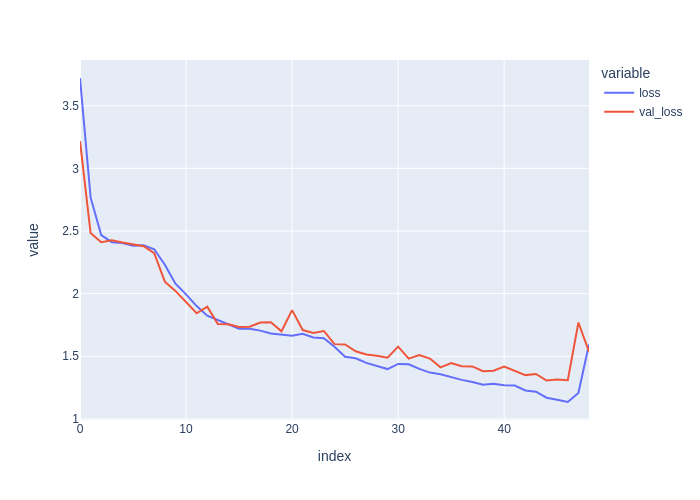  

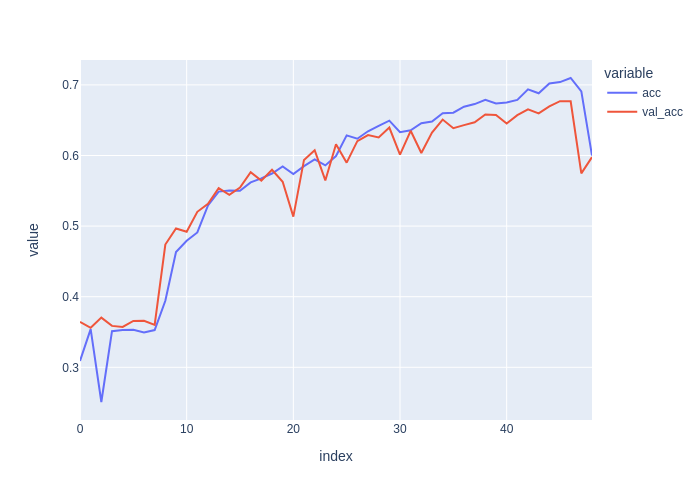  

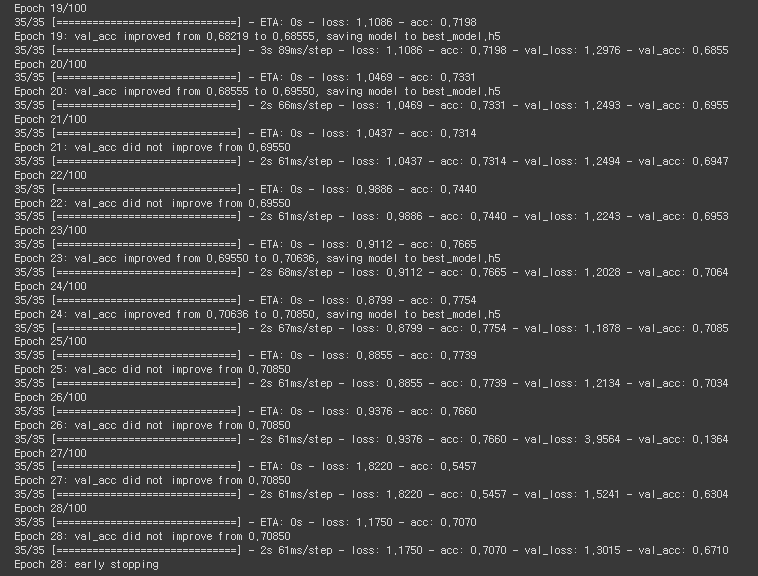

In [ ]:
with strategy.scope():
    input = tf.keras.Input(shape=(MAX_LEN,))
    x = tf.keras.layers.Embedding(vocab_size,embedding_dim)(input)
    x = tf.keras.layers.LSTM(128)(x)
    y = tf.keras.layers.Dense(num_classes,activation="softmax")(x)
    MODEL = tf.keras.Model(inputs=input,outputs=y)
    es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
    mc = tf.keras.callbacks.ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

    MODEL.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])
history = MODEL.fit(dis_train_ds, epochs=100, callbacks=[es, mc], validation_data=(dis_test_ds),steps_per_epoch=int(len(x_train)/256)
,validation_steps=int(len(x_test)/256),)

# 실험종료

8가지의 머신러닝 방법을 적용하고, 마지막에는 LSTM 딥러닝 모델을 적용하여 실험하였다  
딥러닝 모델의 경우, 현재 LMS의 GPU가 없기 때문에 코랩에서 돌리고 해당 모델의 구조와, 결과만을 가져왔다  
처음 단어 사전의 제한 없이 다 사용 했을때 가장 우수한 알고리즘은 로지스틱 회귀와 서포트 벡터 머신이었다 정확도 또한 우수하며, 시간도 작게 걸렸다  
따라서 Voting을 사용할 때 두가지의 모델을 통해서 시도했으며, 가장 좋은 결과를 얻을 수 있었다  
다음은 단어를 1천개로 제한하여 시도했는데 여기에선 나이브 베이즈 계열의 알고리즘들이 대체로 우수한 성능을 보였으며, 특히 이전 단계의 Voting 모델보다 효과적인 성능을 보여주었다  
마지막 1천개의 단어제한으로 LSTM 모델을 시도했는데 이 또한 73 정도의 정확도에 머무름으로써 이번 task에서는 효율과 속도 모두 머신러닝의 알고리즘이 차지하게 되었다  
딥러닝이 대중화 되면서 왠만한 문제는 딥러닝을 통해 풀고자 하는 시도가 많지만 머신러닝은 여전히 합리적인 선택이 될 수 있으며, 가능한 여러 파라미터를 통해 시도하면 딥러닝 보다 좋은 결과를 얻을 수 있을 것으로 보인다